In [10]:
import os
import sys

# Get absolute path of the project root (where 'src/' folder is)
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)


In [11]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets
import matplotlib.pyplot as plt

from src.quantum_encoding.quantum_encoder import encode_dataset
from src.quantum_encoding.quantum_mlp_model import build_quantum_inspired_mlp


In [12]:
# 1️⃣ Load dataset
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()

# 2️⃣ Encode images using amplitude encoding
x_train_encoded = encode_dataset(x_train, save_path="data/encoded/x_train_encoded.npy")
x_test_encoded = encode_dataset(x_test, save_path="data/encoded/x_test_encoded.npy")

print("Train Encoded Shape:", x_train_encoded.shape)
print("Test Encoded Shape:", x_test_encoded.shape)

Encoding 60000 images ...
✅ Encoded dataset saved at: data/encoded/x_train_encoded.npy
Encoding 10000 images ...
✅ Encoded dataset saved at: data/encoded/x_test_encoded.npy
Train Encoded Shape: (60000, 784)
Test Encoded Shape: (10000, 784)


In [13]:
# 3️⃣ Build model
model = build_quantum_inspired_mlp(input_dim=x_train_encoded.shape[1])

# 4️⃣ Train model
history = model.fit(
    x_train_encoded, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.1,
    verbose=1
)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6327 - loss: 1.0480 - val_accuracy: 0.8310 - val_loss: 0.4586
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8307 - loss: 0.4729 - val_accuracy: 0.8485 - val_loss: 0.3993
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8516 - loss: 0.4111 - val_accuracy: 0.8602 - val_loss: 0.3745
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8590 - loss: 0.3848 - val_accuracy: 0.8692 - val_loss: 0.3575
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8664 - loss: 0.3615 - val_accuracy: 0.8708 - val_loss: 0.3455
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8730 - loss: 0.3490 - val_accuracy: 0.8683 - val_loss: 0.3425
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8765 - loss: 0.3353 - val_accuracy: 0.8752 - val_loss: 0.3343
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8807 - loss: 0.3201 - val_accuracy: 0.

In [14]:
# 5️⃣ Evaluate
test_loss, test_acc = model.evaluate(x_test_encoded, y_test)
print(f"\n✅ Quantum-Inspired Model Accuracy: {test_acc*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8767 - loss: 0.3434

✅ Quantum-Inspired Model Accuracy: 87.37%


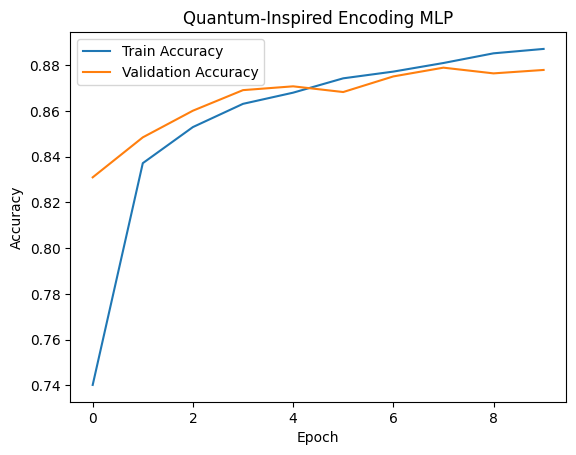

In [15]:

# 6️⃣ Visualize training performance
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Quantum-Inspired Encoding MLP')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [16]:
# 7️⃣ Save model
model.save("models/quantum_inspired_mlp.h5")
print("✅ Model saved at models/quantum_inspired_mlp.h5")

✅ Model saved at models/quantum_inspired_mlp.h5
